In [3]:
%matplotlib inline

In [4]:
import torch 
import torchvision
import torchvision.transforms as transforms

In [5]:
use_cuda = True
# if gpu is to be used
if use_cuda and torch.cuda.is_available():
  device = torch.device("cuda")
  torch.set_default_tensor_type('torch.cuda.FloatTensor')
else:
  device = torch.device("cpu")
print(device)

cpu


In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.embeddings = {}
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        for i in range(1, 9):
            self.embeddings[i] = nn.Linear(i*2*3, i)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        for i in range(1, 9):
            x = self.embeddings[i](x)
        return x


net = Net()
print(net)

Net(
)


In [6]:
transform = transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./cifardata', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./cifardata', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


torch.Size([3, 32, 32])
horse plane   cat   cat


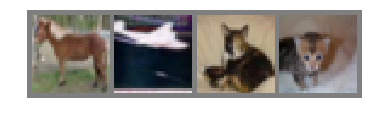

Process Process-2:
Process Process-1:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/afs/inf.ed.ac.uk/user/s17/s1791387/miniconda3/envs/diss/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/afs/inf.ed.ac.uk/user/s17/s1791387/miniconda3/envs/diss/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/afs/inf.ed.ac.uk/user/s17/s1791387/miniconda3/envs/diss/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/afs/inf.ed.ac.uk/user/s17/s1791387/miniconda3/envs/diss/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/afs/inf.ed.ac.uk/user/s17/s1791387/miniconda3/envs/diss/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/afs/inf.ed.ac.uk/user/s17/s1791387/miniconda3/envs/diss/lib/python3.6/mu

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(images[0].shape)
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channel, 5x5 kernel size
        self.conv1 = nn.Conv2d(3, 6, 5)
        # max pooling over a 2x2 window
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [10]:
import torch.optim as optim

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

In [13]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        print(labels)
        # zero the parameter gradients
        # otherwise the gradient will accumulate
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        print(outputs)
        break
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print stats
        running_loss += loss.item()
        
        if i % 2000 == 1999:
            # print every 2000 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(
                    epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished training')

tensor([ 5,  2,  3,  5])
tensor([[ 0.0020, -0.0373,  0.0567, -0.0691,  0.1121, -0.0911,  0.0000,
          0.0159,  0.0670,  0.0345],
        [-0.0176,  0.0074,  0.0547, -0.0691,  0.1088, -0.0989,  0.0100,
         -0.0006,  0.0494,  0.0196],
        [ 0.0775, -0.0166,  0.0777, -0.0566,  0.0833, -0.0908, -0.0858,
          0.0472,  0.1152, -0.0007],
        [-0.0134, -0.0177,  0.0332, -0.0630,  0.0720, -0.0943, -0.0198,
          0.0026,  0.0704, -0.0009]])
tensor([ 1,  4,  0,  5])
tensor([[-0.0289, -0.0018,  0.0246, -0.0477,  0.0934, -0.0973, -0.0040,
         -0.0124,  0.0840,  0.0084],
        [-0.0427,  0.0023,  0.0555, -0.0731,  0.1144, -0.1050,  0.0209,
         -0.0008,  0.0470,  0.0203],
        [-0.0138, -0.0078,  0.0630, -0.0695,  0.1045, -0.0967,  0.0137,
         -0.0034,  0.0576,  0.0226],
        [-0.0132, -0.0029,  0.0571, -0.0424,  0.0828, -0.1018, -0.0184,
          0.0174,  0.1080,  0.0225]])
Finished training


Test set

GroundTruth:    cat  ship  ship plane


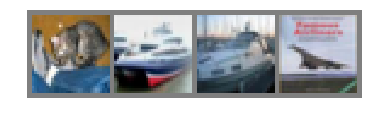

Process Process-8:
Traceback (most recent call last):
  File "/afs/inf.ed.ac.uk/user/s17/s1791387/miniconda3/envs/diss/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process Process-7:
Traceback (most recent call last):
  File "/afs/inf.ed.ac.uk/user/s17/s1791387/miniconda3/envs/diss/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/afs/inf.ed.ac.uk/user/s17/s1791387/miniconda3/envs/diss/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/afs/inf.ed.ac.uk/user/s17/s1791387/miniconda3/envs/diss/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/afs/inf.ed.ac.uk/user/s17/s1791387/miniconda3/envs/diss/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/afs/inf.ed.ac.uk/user/s17/s1791387/miniconda3/envs/diss/lib/python3.6/si

In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [14]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:   frog  ship  ship  ship


In [16]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct/total))

Accuracy of the network on the 10000 test images: 55 %


In [17]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 58 %
Accuracy of   car : 75 %
Accuracy of  bird : 38 %
Accuracy of   cat : 44 %
Accuracy of  deer : 51 %
Accuracy of   dog : 36 %
Accuracy of  frog : 54 %
Accuracy of horse : 67 %
Accuracy of  ship : 74 %
Accuracy of truck : 56 %


In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

cpu
